In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [47]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [49]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [50]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [51]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [52]:
# printing column name where infinity is present
df.replace([-np.inf, np.inf], np.nan, inplace = True)

In [53]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [54]:
df["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [55]:
#encoding
mod_df = df
l = mod_df.columns.tolist()
for i in l:
  df1 = []
  req = list(set((mod_df[i].tolist())))
  length = [i for i in range(len(list(set((mod_df[i].tolist())))))]
  res = {}
  for key in req:
    for value in length:
      res[key] = value
      length.remove(value)
      break
  for j in mod_df[i]:
    if type(j) == str:
      required = res[j]
      df1.append(required)
  if len(df1)>0:
    mod_df[i] = df1
  df1 = []

In [56]:
mod_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,2
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,2
4,0.37,0.52,2,159,3,0,1,0,7,2
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,6,2
14995,0.37,0.48,2,160,3,0,1,0,6,2
14996,0.37,0.53,2,143,3,0,1,0,6,2
14997,0.11,0.96,6,280,4,0,1,0,6,2


**The data didn't have any null or nan values, however it required encoding as department and salary were strings, which are then encoded into 'int'**

## **2) Relationship between satisifaction level and Working hours of the employee, who left the organization**

In [57]:
left = mod_df[mod_df.left != 0]
len(left)

3571

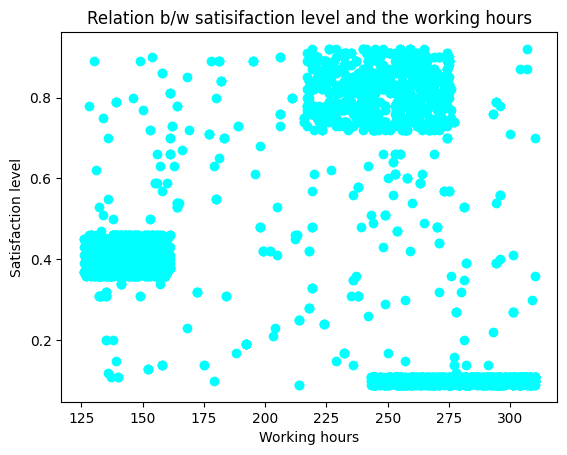

In [58]:
plt.title("Relation b/w satisifaction level and the working hours")
plt.xlabel("Working hours")
plt.ylabel("Satisfaction level")
plt.scatter(left.average_montly_hours, left.satisfaction_level, color = 'cyan')

In [59]:
#checking correlation coefficient for the type of relation b/w satisifaction level and the working hours

corr = np.corrcoef(left.average_montly_hours, left.satisfaction_level)
corr

array([[ 1.        , -0.08411746],
       [-0.08411746,  1.        ]])

In [60]:
req = mod_df.drop(['last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident'], axis = 1)

In [61]:
req.corr()

,satisfaction_level,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,-0.388375,0.025605,0.008482,-0.050022
left,-0.388375,1.000000,-0.061788,0.001907,0.157898
promotion_last_5years,0.025605,-0.061788,1.000000,-0.057138,-0.098119
Department,0.008482,0.001907,-0.057138,1.000000,0.050638
salary,-0.050022,0.157898,-0.098119,0.050638,1.000000


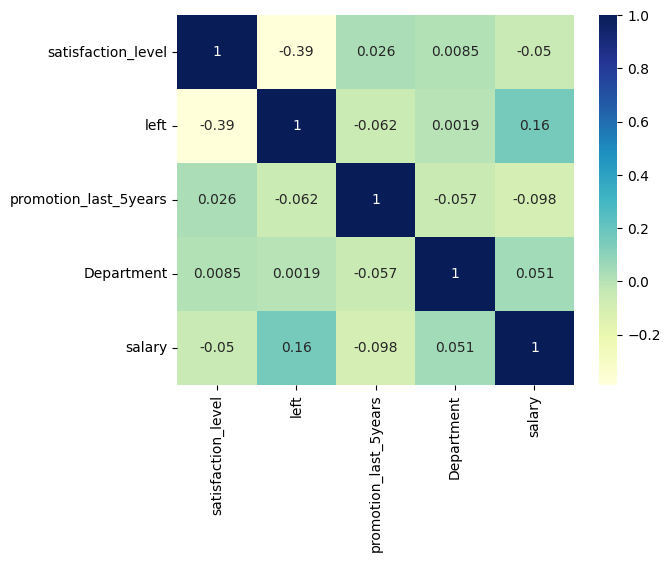

In [62]:
import seaborn as sb

dataplot = sb.heatmap(req.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = mod_df.drop('left', axis = 1)  
y = mod_df.left    
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(8,'Score')) 

                   Specs       Score
3   average_montly_hours  945.588933
5          Work_accident  306.737710
0     satisfaction_level  228.193183
4     time_spend_company  191.708547
8                 salary  108.030567
6  promotion_last_5years   56.044865
2         number_project    3.390205
7             Department    0.061952


In [64]:
len(mod_df.columns.to_list())

10

In [65]:
mod_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,2
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,2
4,0.37,0.52,2,159,3,0,1,0,7,2
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,6,2
14995,0.37,0.48,2,160,3,0,1,0,6,2
14996,0.37,0.53,2,143,3,0,1,0,6,2
14997,0.11,0.96,6,280,4,0,1,0,6,2


In [66]:
mod_df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [67]:
x = mod_df[['satisfaction_level',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'salary']]
y = mod_df['left']

In [68]:
x

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,salary
0,0.38,157,3,0,2
1,0.80,262,6,0,1
2,0.11,272,4,0,1
3,0.72,223,5,0,2
4,0.37,159,3,0,2
...,...,...,...,...,...
14994,0.40,151,3,0,2
14995,0.37,160,3,0,2
14996,0.37,143,3,0,2
14997,0.11,280,4,0,2


In [69]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## **4) Machine Learning models to predict the exit of employees**

## **Decision Tree**

In [72]:

from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='gini',max_depth = 6, random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [73]:

Y_pred = clf.predict(X_test)
Y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [74]:

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with criterion entropy: 0.9483


In [75]:

Y_train_pred = clf.predict(X_train)


print('Model accuracy score with criterion entropy: {0:.4f}'. format(accuracy_score(Y_train, Y_train_pred)))

Model accuracy score with criterion entropy: 0.9712


In [76]:


print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 0.9712
Test set score: 0.9483


Confusion matrix

 [[2837   44]
 [ 150  719]]


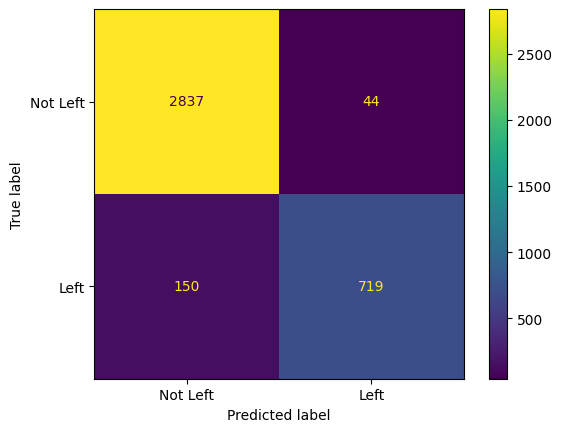

In [77]:


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Left', 'Left'])

cm_display.plot()
plt.show()

In [78]:


from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2881
           1       0.94      0.83      0.88       869

    accuracy                           0.95      3750
   macro avg       0.95      0.91      0.92      3750
weighted avg       0.95      0.95      0.95      3750



Confusion matrix

 [[2763  118]
 [ 102  767]]


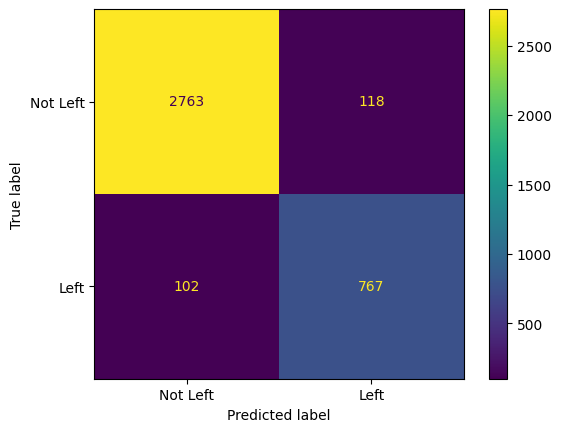

In [85]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Left', 'Left'])

cm_display.plot()
plt.show()

In [86]:


from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2881
           1       0.94      0.83      0.88       869

    accuracy                           0.95      3750
   macro avg       0.95      0.91      0.92      3750
weighted avg       0.95      0.95      0.95      3750

